In [3]:
# prepare data
import csv
import re
import codecs
import time
import pandas as pd

with open('tempTw2.csv', encoding='utf-8') as f:
    tweets=f.read().split(',')

# to unique 
tweetsUnique=list(set(tweets))

#remove the matching pattern from given list
def remove(strList, reEx, to):
    temp=[]
    for i in range(0,len(strList)):
        temp.append(re.sub(reEx, to , strList[i]))
    return temp

def preProcessor(tweets):
    # delete https:
    reEx = r'https://[\w|\.|\/]+'
    tempTweets=remove(tweets, reEx, '')
    # delete hash-tag
    reEx = r'#.+'
    tempTweets=remove(tempTweets, reEx, '')     
    #delete @username
    reEx = r'@\w+'
    tempTweets=remove(tempTweets, reEx, '')
    #every num to 0
    reEx = r'[0-9]'
    tempTweets=remove(tempTweets, reEx, '0')
    
    # 他に考えられる処理
    # 大文字小文字
    # 半角を全角に
    # 必要で有れば辞書を用いて統一するwordも。
    # ストップワードの除去
    # 絵文字の消去
    
    #for  i in range(0,10):
    #    print(tempTweets[i])
    
    return tempTweets

# drop unneeded information (preprocessing)
tweetsProcessed=preProcessor(tweetsUnique)

In [11]:
tweetsProcessed

['',
 'ドル円えらい下だなぁ。',
 '【USD/JPY】ドル円専用スレ 【$\\】 ⇒ ドル円:000.00ユーロ円:000.00豪ドル円:00.00ポンド円:000.00ユーロドル:0.0000ポンドドル:0.0000',
 'この画像は0月0日 00時00分に取得されました。【ドル円USD／JPY】000.00 ',
 '正午のドルは000円後半、押し目買いの参加者少なく ［東京\u3000６日\u3000ロイター］ - 正午のドル／円は、前日ニューヨーク市場午後５時時点と比べ、ドル安／円高の１０９  ',
 '【GBP/USD】復活ﾎﾟﾝﾄﾞﾙ専用⇒ ドル円:000.00ユーロ円:000.00豪ドル円:00.00ポンド円:000.00ユーロドル:0.0000ポンドドル:0.0000',
 'ドル円L追加して様子見',
 'こちらもドル円と相関しやすいDXYの時間足。ドル円と同じような波動が書けます。いやっドル円より綺麗かな。 ',
 '【替】ドル円１０９．５６レベルに安値伸ばす、４月２４日早朝の水準に＝ロンドン為替  ドル円１０９．５６レベルに安値伸ばす、４月２４日早朝の水準に＝ロンドン為替 \u3000ドル円は000.00レベ （つづきはこちらから）',
 '今日やはり目立ったのはドル円だな。あとNZはその中で耐えたと思うと、ここから登るのもまた早い気がする。のでロングしてみた。',
 'ユロル↓\nユロ円↓\nドル円↑',
 'RT : ①実は介入（元売り）していた、②外貨準備の構成を見直し（ユーロ→ドルor金→ドルor円→ドルetc）たい、③その他・不明・謎。 ',
 'New post: 東京午前＝株は底堅い、ドル円・クロス円に買い戻し入る ',
 '▼日本にとって何の利点もない ',
 'ドル円も↓行ってくれてたすかる',
 'ドル円0時間\nそろそろ、売り深追い危険ゾーンだけど、火曜だからね…\n何とも、私には、わかりません…🤖 ',
 'ドル円結構下げてきてるけど個人的にはもうちょっと下がるかなーと思ってる',
 '【GBP】ポンドはどうする？【£】 (000)⇒ ドル円:000.00ユーロ円:000.00豪ドル円:00.00ポンド円:000.00ユーロドル:0.0000ポンドドル:0.0000',
 'RT : ドル円ヽ(･ω･)/ｽﾞ

In [6]:
# tokenize since now tweets are Japanese, then calculate tf-idf
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# just for measuring time
start = time.time()

# need to recieve unicode text, this is callable for TfidfVectorizer
# need to recieve unicode text
def myTokenizer(text):
    TARGET_CATEGORY = ["名詞", "動詞",  "形容詞", "副詞", "連体詞", "助動詞"]
    wordsIn=[]
    t = Tokenizer()
    tokens = t.tokenize(text)
    for token in tokens:
        tokenCategory = token.part_of_speech.split(',')[0]
        tokenBasic = token.base_form
        if  (tokenCategory=='名詞' and token.part_of_speech.split(',')[1]=='固有名詞'):
            wordsIn.append(token.surface)
        elif tokenCategory in TARGET_CATEGORY:
            if tokenBasic != '*':                               #if basic form can be defined
                wordsIn.append(tokenBasic)
    
    return wordsIn

# execute tf-idf
vectorizer = TfidfVectorizer(tokenizer=myTokenizer, stop_words='ドル円')
tfidf_weighted_matrix = vectorizer.fit_transform(tweetsProcessed)

# for time
elapsed_time = time.time() - start
print(elapsed_time)

# visualize tf-idf
#print(u"テキスト数:%d,単語の種類数:%d" % tfidf_weighted_matrix.shape)
#print(u"単語の種類:%s\n" % ",".join(vectorizer.get_feature_names()))
#for n, text in enumerate(test):
#    print("[%s]" % test)
#    print(u"重み: %s\n" % ",".join(["%s:%.2f" % (token, weight) for token, weight in
#                                      zip(vectorizer.get_feature_names(),
#                                          tfidf_weighted_matrix.getrow(n).toarray()[0]
#                                          )]))

41.12801718711853


In [7]:
print(u"テキスト数:%d,単語の種類数:%d" % tfidf_weighted_matrix.shape)
print(u"単語の種類:%s\n" % ",".join(vectorizer.get_feature_names()))

テキスト数:2121,単語の種類数:3682
単語の種類:a,amazon,ask,at,aud,audjpy,b,bb,bit,bitcoin,blog,bram,btc,by,ch,chf,cis,d,dax,dc,dl,dlmarket,dmm,dollars,doru,dream,dxy,ecb,edy,en,eu,eur,exchange,experia,f,fanews,fbi,flash,fomc,for,forex,fut,fx,gbp,gnp,good,h,have,heyzo,htt,https,if,imm,in,inshort,ism,jasdaq,jfx,jpy,june,just,kindle,klug,l,lc,ldn,ldnfix,limit,ll,ln,long,lot,lovely,m,ma,mac,macbook,market,msq,n,new,nhk,nikkei,nk,nt,ny,nz,nzd,o,oh,opec,or,orz,out,p,pf,pips,pivot,pm,post,pp,pro,rba,rci,reuters,rsi,rt,s,sma,ssssss,stop,swp,t,topix,tradingview,uae,ufj,usd,usdjpy,ust,vi,via,vix,vs,w,wbs,wti,www,x,xau,yahoo,yen,yours,yuro,z,д,〇,ぁ,あいつ,あう,あがる,あきる,あく,あくどい,あげる,あたり,あっち,あと,あなた,あの,あまり,あまりに,あらためて,あり,ありがたい,ある,ある程度,あれ,あん,あんまり,ぃが,い,いい,いう,いえる,いかが,いかる,いきなり,いきる,いく,いくつ,いくら,いける,いさぎよい,いざなぎ景気,いじくる,いじる,いずれ,いたす,いただく,いただける,いたる,いちいち,いちばん,いっきに,いっしょ,いったん,いっぱい,いつ,いつか,いつぞや,いつのまにか,いつの間にか,いつも,いとこ,いま,いまいち,いも,いる,いろいろ,いろんな,う,うかがう,うごける,うた,うち,うてる,うまい,うむ,うめ,うめる,うり,うる,うれしい,うんちく,ええ,えらい,える,おいら,おう,おえる,おおむね,おかげ,おかし,おかしい,おく,おさまる,おさん,お

In [16]:
# k-means
import numpy as np
from sklearn.cluster import KMeans

# just for measuring time
start = time.time()

# reshape data
inputs=np.vstack((tfidf_weighted_matrix.getrow(0).toarray()[0],tfidf_weighted_matrix.getrow(1).toarray()[0]))
for i in range(2,tfidf_weighted_matrix.shape[0]):
    inputs=np.vstack((inputs, tfidf_weighted_matrix.getrow(i).toarray()[0]))

# cllasify
#predict = KMeans(n_clusters=3, random_state=1).fit_predict(inputs)

predict2 = KMeans(n_clusters=2, random_state=1).fit_predict(inputs)
predict3 = KMeans(n_clusters=3, random_state=1).fit_predict(inputs)
predict4 = KMeans(n_clusters=4, random_state=1).fit_predict(inputs)
predict5 = KMeans(n_clusters=5, random_state=1).fit_predict(inputs)


# for time
elapsed_time = time.time() - start
print (elapsed_time)

118.1163923740387


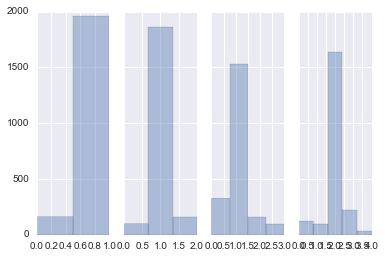

In [29]:
# 困ったら図示①　→　ゴミ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sns.distplot(predict2, kde=False, rug=False, bins=2) 
#sns.distplot(predict3, kde=False, rug=False, bins=3) 
#sns.distplot(predict4, kde=False, rug=False, bins=4) 
#sns.distplot(predict5, kde=False, rug=False, bins=5) 

# call regplot on each axes
fig, (ax2, ax3, ax4, ax5) = plt.subplots(ncols=4, sharey=True)
sns.distplot(predict2, kde=False, rug=False, bins=2, ax=ax2) 
sns.distplot(predict3, kde=False, rug=False, bins=3, ax=ax3) 
sns.distplot(predict4, kde=False, rug=False, bins=4, ax=ax4) 
sns.distplot(predict5, kde=False, rug=False, bins=5, ax=ax5) 

In [25]:
# 困ったら図示②　→　ゴミ
from sklearn.decomposition import PCA

# PCAで次元削減
pca = PCA(n_components=2)
users_r = pca.fit_transform(inputs)

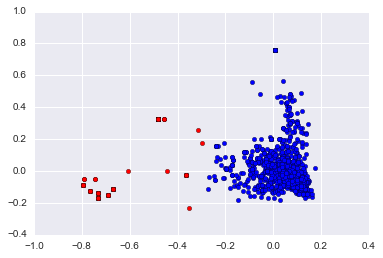

In [43]:
#plt.scatter(users_r.T[0],users_r.T[1])

for i in range(0, len(users_r.T[0])):
    if predict2[i] == 0:
         plt.scatter(users_r.T[0][i],users_r.T[1][i], c='red')
    else:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='blue')
        

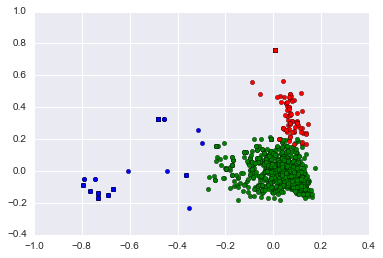

In [45]:
for i in range(0, len(users_r.T[0])):
    if predict3[i] == 0:
         plt.scatter(users_r.T[0][i],users_r.T[1][i], c='red')
    elif predict3[i] == 1:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='green')
    else:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='blue')

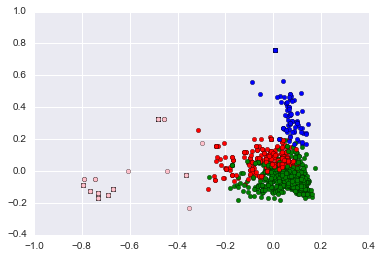

In [46]:
for i in range(0, len(users_r.T[0])):
    if predict4[i] == 0:
         plt.scatter(users_r.T[0][i],users_r.T[1][i], c='red')
    elif predict4[i] == 1:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='green')
    elif predict4[i] == 2:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='pink')
    else:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='blue')

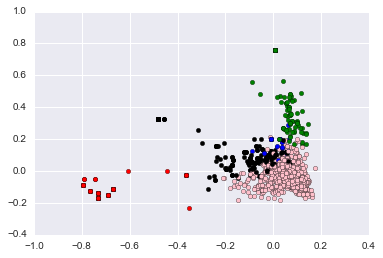

In [47]:
for i in range(0, len(users_r.T[0])):
    if predict5[i] == 0:
         plt.scatter(users_r.T[0][i],users_r.T[1][i], c='red')
    elif predict5[i] == 1:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='green')
    elif predict5[i] == 2:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='pink')
    elif predict5[i] == 3:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='black')
    else:
        plt.scatter(users_r.T[0][i],users_r.T[1][i], c='blue')

In [ ]:
案　とりあえず2値分類

過去、未来？
広告、ニュース、個人？
クラスタリングに投げる
if-idf??
→word2vec

日付で分類？…あんまりうまくいかなさそう、ドル円急落したときなら…

In [ ]:
i want a surive which proofreads mails or documents to sutable ones for business But, not sure, there is a bussiness chance in it

In [ ]:
# ref
# http://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means